In [22]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

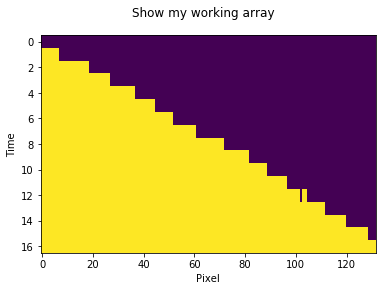

mean velocity = 0.825 std 0.19843134833 mm/s


In [32]:
im = Image.open("KymographLine.png")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 
#threshold values to 
trh=150
pix_array[pix_array<=150] = 1
pix_array[pix_array>150] = 0
#see the array that you want to work and configure it
work_array=pix_array[:,1:-1]
#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=10 #mm
Dtime=10 #s
pixels=px
x=ones*(size/px)
velocity=np.empty(py-1)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])/Dtime
mean_vel=np.mean(velocity)

#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")